<a href="https://colab.research.google.com/github/Appaji-Yadla/Optimizing-Predictive-Modeling-A-Comprehensive-Study-of-Data-Handling-and-Model-Selection-Strategies/blob/main/Optimizing_Predictive_Modeling_MedicalData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Overview: Optimizing Predictive Modeling**

Welcome to our exciting data science project, "Optimizing Predictive Modeling: A Comprehensive Study of Data Handling and Model Selection Strategies." In this project, we embark on a thrilling adventure into the world of data science, exploring various methodologies to enhance predictive modeling accuracy.

**Project Objectives**

We aim to conduct a thorough investigation into the complexities of predictive modeling, empowering participants to make informed decisions and drive impactful outcomes. Our objectives include:


1. Exploring various data handling methodologies, including preprocessing techniques and feature engineering.

2. Researching for accuracy to determine the most promising data handling methodologies.

3. Understanding the decision-making process behind selecting certain methodologies.

4. Enhancing decision-making skills in data science through experimentation.

5. Exploring evaluation techniques and feature selection methods for model performance improvement.

6. Understanding model interpretability through techniques like feature importance analysis.

**Workflow**

Participants will follow a structured workflow:

1. Preparation of an overview report detailing project progression strategies.

2. Exploratory Data Analysis (EDA) for three days.

3. Building Machine Learning (ML) algorithms over two days.

4. Constructing an Artificial Neural Network (ANN) model within two days.

#**Mount colab and read the dataframe**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Innomatics_DS/DL_Projects/Medicare_Physician_Other_Practitioners_by_Provider_2021.csv')

<ipython-input-3-0f7d20423760>:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Innomatics_DS/DL_Projects/Medicare_Physician_Other_Practitioners_by_Provider_2021.csv')


In [ ]:
df.head()

,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,Rndrng_Prvdr_St2,Rndrng_Prvdr_City,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
0,1003000126,Enkeshafi,Ardalan,NaN,M.D.,M,I,6410 Rockledge Dr Ste 304,NaN,Bethesda,...,0.37,0.44,0.75,0.75,0.62,0.11,0.58,0.06,0.14,1.8026
1,1003000134,Cibull,Thomas,L,M.D.,M,I,2650 Ridge Ave,Evanston Hospital,Evanston,...,0.15,0.20,0.52,0.51,0.24,0.11,0.38,0.01,0.03,1.0785
2,1003000142,Khalil,Rashid,NaN,M.D.,M,I,4126 N Holland Sylvania Rd,Suite 220,Toledo,...,0.39,0.38,0.58,0.70,0.33,0.09,0.75,NaN,0.06,1.4920
3,1003000423,Velotta,Jennifer,A,M.D.,F,I,11100 Euclid Ave,NaN,Cleveland,...,0.28,0.17,0.55,0.46,0.16,0.17,0.38,NaN,NaN,0.6362
4,1003000480,Rothchild,Kevin,B,MD,M,I,12605 E 16th Ave,NaN,Aurora,...,0.32,0.40,0.48,0.65,0.31,0.12,0.59,NaN,NaN,1.8233


In [ ]:
df.shape

(1198754, 73)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198754 entries, 0 to 1198753
Data columns (total 73 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Rndrng_NPI                     1198754 non-null  int64  
 1   Rndrng_Prvdr_Last_Org_Name     1198754 non-null  object 
 2   Rndrng_Prvdr_First_Name        1133917 non-null  object 
 3   Rndrng_Prvdr_MI                766815 non-null   object 
 4   Rndrng_Prvdr_Crdntls           1051513 non-null  object 
 5   Rndrng_Prvdr_Gndr              1133918 non-null  object 
 6   Rndrng_Prvdr_Ent_Cd            1198754 non-null  object 
 7   Rndrng_Prvdr_St1               1198754 non-null  object 
 8   Rndrng_Prvdr_St2               300760 non-null   object 
 9   Rndrng_Prvdr_City              1198754 non-null  object 
 10  Rndrng_Prvdr_State_Abrvtn      1198754 non-null  object 
 11  Rndrng_Prvdr_State_FIPS        1198754 non-null  object 
 12  Rndrng_Prvdr_Z

In [ ]:
df.duplicated().sum()

0

#**Data Cleaning and Feature Engineering**

Combining/concatenate the columns

In [ ]:
# Fill missing values in the middle initial column with an empty string
df['Rndrng_Prvdr_MI'].fillna('', inplace=True)

# Concatenate the first name, middle initial (if present), and last name with a space separator
df['Provider_Full_Name'] = df['Rndrng_Prvdr_First_Name'] + df['Rndrng_Prvdr_MI'].apply(lambda x: ' ' + x if x != '' else '') + ' ' + df['Rndrng_Prvdr_Last_Org_Name']

# Drop the original name columns if you no longer need them
df.drop(columns=['Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name', 'Rndrng_Prvdr_MI'], inplace=True)

In [ ]:
# Convert zip code to string type
df['Rndrng_Prvdr_Zip5'] = df['Rndrng_Prvdr_Zip5'].astype(str)

# Fill missing values in Rndrng_Prvdr_St2 with empty string
df['Rndrng_Prvdr_St2'].fillna('', inplace=True)

# Combine address components into a single variable
df['Provider_Address'] = df['Rndrng_Prvdr_St1'] + (' ' + df['Rndrng_Prvdr_St2'] if df['Rndrng_Prvdr_St2'].notnull().all() else '') + ', ' + df['Rndrng_Prvdr_City'] + ', ' + df['Rndrng_Prvdr_State_Abrvtn'] + ' ' + df['Rndrng_Prvdr_Zip5']

# Drop the individual address components
df.drop(columns=['Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2', 'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_Zip5'], inplace=True)


In [ ]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['Rndrng_NPI', 'Rndrng_Prvdr_RUCA', 'Tot_HCPCS_Cds', 'Tot_Benes',
       'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt',
       'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Tot_HCPCS_Cds',
       'Drug_Tot_Benes', 'Drug_Tot_Srvcs', 'Drug_Sbmtd_Chrg',
       'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt', 'Drug_Mdcr_Stdzd_Amt',
       'Med_Tot_HCPCS_Cds', 'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg',
       'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt',
       'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt',
       'Bene_Age_75_84_Cnt', 'Bene_Age_GT_84_Cnt', 'Bene_Feml_Cnt',
       'Bene_Male_Cnt', 'Bene_Race_Wht_Cnt', 'Bene_Race_Black_Cnt',
       'Bene_Race_API_Cnt', 'Bene_Race_Hspnc_Cnt', 'Bene_Race_NatInd_Cnt',
       'Bene_Race_Othr_Cnt', 'Bene_Dual_Cnt', 'Bene_Ndual_Cnt',
       'Bene_CC_AF_Pct', 'Bene_CC_Alzhmr_Pct', 'Bene_CC_Asthma_Pct',
       'Bene_CC_Cncr_Pct', 'Bene_CC_CHF_Pct', 'Bene_CC_CKD_Pct',
       'Bene_CC_COPD_Pct', 'Ben

**Correlation Analysis for numerical features**

In [ ]:
df[numeric_columns].corr()


,Rndrng_NPI,Rndrng_Prvdr_RUCA,Tot_HCPCS_Cds,Tot_Benes,Tot_Srvcs,Tot_Sbmtd_Chrg,Tot_Mdcr_Alowd_Amt,Tot_Mdcr_Pymt_Amt,Tot_Mdcr_Stdzd_Amt,Drug_Tot_HCPCS_Cds,...,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Opo_Pct,Bene_CC_RAOA_Pct,Bene_CC_Sz_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
Rndrng_NPI,1.000000,0.000198,-0.001310,0.000713,-0.000477,0.000006,-0.000389,-0.000243,-0.000215,-0.001239,...,0.001541,-0.000855,0.000220,0.000326,0.000406,0.001326,-0.000503,0.001160,0.001023,0.000527
Rndrng_Prvdr_RUCA,0.000198,1.000000,-0.008420,-0.002988,-0.002832,-0.007087,-0.008543,-0.007619,-0.007329,0.007166,...,-0.030300,-0.003790,-0.065259,-0.014136,-0.038892,-0.061950,-0.035950,-0.016001,-0.037277,-0.042329
Tot_HCPCS_Cds,-0.001310,-0.008420,1.000000,0.175991,0.155096,0.214179,0.218184,0.198420,0.199812,0.383475,...,-0.211548,-0.083477,0.091979,0.119964,-0.002885,0.042364,0.029447,-0.114016,-0.053025,-0.019413
Tot_Benes,0.000713,-0.002988,0.175991,1.000000,0.557116,0.698045,0.630485,0.658707,0.658190,0.017792,...,-0.032902,-0.017991,-0.000569,-0.006564,-0.004219,-0.007663,-0.019807,-0.014795,-0.010589,-0.004515
Tot_Srvcs,-0.000477,-0.002832,0.155096,0.557116,1.000000,0.583084,0.552145,0.547321,0.550157,0.210955,...,-0.018976,-0.008766,0.006100,0.006244,-0.002974,0.026726,0.005486,-0.009872,-0.012910,0.006946
Tot_Sbmtd_Chrg,0.000006,-0.007087,0.214179,0.698045,0.583084,1.000000,0.815822,0.807329,0.800874,0.151821,...,-0.029404,-0.000752,0.033958,0.032354,0.018514,0.019765,0.018034,-0.013791,-0.005459,0.013376
Tot_Mdcr_Alowd_Amt,-0.000389,-0.008543,0.218184,0.630485,0.552145,0.815822,1.000000,0.994813,0.992840,0.240789,...,-0.042880,-0.002607,0.033769,0.030614,0.013888,0.029876,0.009489,-0.015329,-0.015441,0.015083
Tot_Mdcr_Pymt_Amt,-0.000243,-0.007619,0.198420,0.658707,0.547321,0.807329,0.994813,1.000000,0.999011,0.205090,...,-0.036497,-0.002709,0.027212,0.024330,0.010939,0.024632,0.006623,-0.013397,-0.013783,0.013113
Tot_Mdcr_Stdzd_Amt,-0.000215,-0.007329,0.199812,0.658190,0.550157,0.800874,0.992840,0.999011,1.000000,0.207980,...,-0.036536,-0.003755,0.026182,0.024246,0.009677,0.023476,0.006719,-0.013625,-0.014806,0.012610
Drug_Tot_HCPCS_Cds,-0.001239,0.007166,0.383475,0.017792,0.210955,0.151821,0.240789,0.205090,0.207980,1.000000,...,-0.197007,-0.157326,-0.113348,-0.109843,-0.165232,0.015275,-0.124661,-0.072342,-0.113661,-0.088502


**Key Observations with target variable:**

| Category                  | Feature                    | Correlation with Bene_Avg_Risk_Scre |
|---------------------------|----------------------------|-------------------------------------|
| Strong Positive Correlation | Bene_CC_Dprssn_Pct      | 0.380412                            |
|                           | Bene_CC_Dbts_Pct         | 0.668845                            |
|                           | Bene_CC_IHD_Pct          | 0.665987                            |
|                           | Bene_CC_Strok_Pct        | 0.500808                            |
| Moderate Positive Correlation | Bene_CC_Cncr_Pct      | 0.200816                            |
|                           | Bene_CC_CHF_Pct          | 0.768951                            |
|                           | Bene_CC_CKD_Pct          | 0.796102                            |
|                           | Bene_CC_COPD_Pct         | 0.618000                            |
| Negative Correlation       | Rndrng_Prvdr_RUCA        | -0.042329                           |
|                           | Tot_HCPCS_Cds            | -0.019413                           |
|                           | Tot_Benes                | -0.004515                           |

These observations suggest that certain medical conditions have a significant impact on the average risk score, with conditions like depression, diabetes, and heart diseases showing strong positive correlations.

Based on the correlation analysis, I decided to select features with a correlation greater than 0.2 with the target variable 'Bene_Avg_Risk_Scre'. Below are the variables that meet this criterion:

In [ ]:
import pandas as pd

# Define the threshold
threshold = 0.2

# Calculate correlations
correlation_matrix = df[numeric_columns].corr()

# Filter variables based on correlation with the target variable
relevant_variables = correlation_matrix[abs(correlation_matrix['Bene_Avg_Risk_Scre']) > threshold]['Bene_Avg_Risk_Scre']

# Display relevant variables
print("Variables with correlation above the threshold:")
print(relevant_variables)


Variables with correlation above the threshold:
Bene_CC_AF_Pct          0.518813
Bene_CC_Alzhmr_Pct      0.576260
Bene_CC_Asthma_Pct      0.324783
Bene_CC_Cncr_Pct        0.200816
Bene_CC_CHF_Pct         0.768951
Bene_CC_CKD_Pct         0.796102
Bene_CC_COPD_Pct        0.618000
Bene_CC_Dprssn_Pct      0.380412
Bene_CC_Dbts_Pct        0.668845
Bene_CC_Hyplpdma_Pct    0.336947
Bene_CC_Hyprtnsn_Pct    0.457004
Bene_CC_IHD_Pct         0.665987
Bene_CC_Strok_Pct       0.500808
Bene_Avg_Risk_Scre      1.000000
Name: Bene_Avg_Risk_Scre, dtype: float64


In [ ]:
# from sklearn.feature_selection import SelectKBest
# from sklearn.feature_selection import chi2


# # Extracting categorical columns
# categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# # Convert categorical columns to numerical values
# df_categorical = pd.get_dummies(df[categorical_columns])

# # Perform feature selection using chi-square test
# selector = SelectKBest(score_func=chi2, k='all')
# selector.fit(df_categorical, df['Bene_Avg_Risk_Scre'])

# # Get scores and p-values
# scores = selector.scores_
# p_values = selector.pvalues_

# # Create a DataFrame to display scores and p-values
# feature_scores = pd.DataFrame({'Feature': df_categorical.columns, 'Score': scores, 'P-Value': p_values})

# # Display the DataFrame sorted by score in descending order
# print(feature_scores.sort_values(by='Score', ascending=False))

#Due to memory issues, i am unable to run this technique

In [ ]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols.columns

Index(['Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Ent_Cd',
       'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_RUCA_Desc',
       'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type',
       'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Drug_Sprsn_Ind', 'Med_Sprsn_Ind',
       'Provider_Full_Name', 'Provider_Address'],
      dtype='object')

In [ ]:
new_variables = ['Rndrng_Prvdr_Gndr', 'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Drug_Sprsn_Ind', 'Med_Sprsn_Ind']

# Create a new DataFrame with relevant variables
new_df = df[relevant_variables.index.tolist() + new_variables]

In [ ]:
new_df.head()

,Bene_CC_AF_Pct,Bene_CC_Alzhmr_Pct,Bene_CC_Asthma_Pct,Bene_CC_Cncr_Pct,Bene_CC_CHF_Pct,Bene_CC_CKD_Pct,Bene_CC_COPD_Pct,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Drug_Sprsn_Ind,Med_Sprsn_Ind
0,0.24,0.30,0.12,0.16,0.39,0.52,0.24,0.37,0.44,0.75,0.75,0.62,0.14,1.8026,M,I,Y,*,#
1,0.10,0.07,0.05,0.14,0.11,0.24,0.06,0.15,0.20,0.52,0.51,0.24,0.03,1.0785,M,I,Y,NaN,NaN
2,0.09,0.06,0.09,0.11,0.21,0.37,0.21,0.39,0.38,0.58,0.70,0.33,0.06,1.4920,M,I,Y,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.16,NaN,0.28,0.17,0.55,0.46,0.16,NaN,0.6362,F,I,Y,*,#
4,NaN,NaN,0.18,NaN,0.21,0.35,0.13,0.32,0.40,0.48,0.65,0.31,NaN,1.8233,M,I,Y,NaN,NaN


In [ ]:
new_df.shape

(1198754, 19)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198754 entries, 0 to 1198753
Data columns (total 19 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   Bene_CC_AF_Pct                 807122 non-null   float64
 1   Bene_CC_Alzhmr_Pct             798910 non-null   float64
 2   Bene_CC_Asthma_Pct             699484 non-null   float64
 3   Bene_CC_Cncr_Pct               799346 non-null   float64
 4   Bene_CC_CHF_Pct                894394 non-null   float64
 5   Bene_CC_CKD_Pct                1017517 non-null  float64
 6   Bene_CC_COPD_Pct               835423 non-null   float64
 7   Bene_CC_Dprssn_Pct             1008119 non-null  float64
 8   Bene_CC_Dbts_Pct               1010590 non-null  float64
 9   Bene_CC_Hyplpdma_Pct           1111640 non-null  float64
 10  Bene_CC_Hyprtnsn_Pct           1130408 non-null  float64
 11  Bene_CC_IHD_Pct                1011980 non-null  float64
 12  Bene_CC_Strok_

In [ ]:
new_df.describe()

,Bene_CC_AF_Pct,Bene_CC_Alzhmr_Pct,Bene_CC_Asthma_Pct,Bene_CC_Cncr_Pct,Bene_CC_CHF_Pct,Bene_CC_CKD_Pct,Bene_CC_COPD_Pct,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre
count,807122.000000,798910.000000,699484.000000,799346.000000,894394.000000,1.017517e+06,835423.000000,1.008119e+06,1.010590e+06,1.111640e+06,1.130408e+06,1.011980e+06,633810.000000,1.198754e+06
mean,0.154913,0.188025,0.092469,0.143776,0.264298,4.085917e-01,0.186019,3.158211e-01,3.538913e-01,6.129091e-01,6.655151e-01,3.962499e-01,0.090644,1.554663e+00
std,0.097053,0.158406,0.051935,0.104030,0.163596,1.750388e-01,0.110494,1.511675e-01,1.319974e-01,1.290952e-01,1.158414e-01,1.565865e-01,0.090547,7.856213e-01
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,3.352000e-01
25%,0.090000,0.080000,0.060000,0.100000,0.140000,2.700000e-01,0.100000,2.100000e-01,2.600000e-01,5.400000e-01,6.100000e-01,2.800000e-01,0.040000,1.015200e+00
50%,0.130000,0.140000,0.090000,0.130000,0.220000,3.800000e-01,0.170000,2.900000e-01,3.400000e-01,6.400000e-01,7.200000e-01,3.700000e-01,0.070000,1.330400e+00
75%,0.210000,0.260000,0.120000,0.160000,0.380000,5.400000e-01,0.250000,3.800000e-01,4.300000e-01,7.200000e-01,7.500000e-01,5.000000e-01,0.130000,1.902175e+00
max,0.750000,0.750000,0.750000,0.750000,0.750000,7.500000e-01,0.750000,7.500000e-01,7.500000e-01,7.500000e-01,7.500000e-01,7.500000e-01,0.750000,1.260250e+01


##**Handling Missing Values**

In [ ]:
new_df.isnull().sum()

Bene_CC_AF_Pct                    391632
Bene_CC_Alzhmr_Pct                399844
Bene_CC_Asthma_Pct                499270
Bene_CC_Cncr_Pct                  399408
Bene_CC_CHF_Pct                   304360
Bene_CC_CKD_Pct                   181237
Bene_CC_COPD_Pct                  363331
Bene_CC_Dprssn_Pct                190635
Bene_CC_Dbts_Pct                  188164
Bene_CC_Hyplpdma_Pct               87114
Bene_CC_Hyprtnsn_Pct               68346
Bene_CC_IHD_Pct                   186774
Bene_CC_Strok_Pct                 564944
Bene_Avg_Risk_Scre                     0
Rndrng_Prvdr_Gndr                  64836
Rndrng_Prvdr_Ent_Cd                    0
Rndrng_Prvdr_Mdcr_Prtcptg_Ind          0
Drug_Sprsn_Ind                   1059977
Med_Sprsn_Ind                    1059977
dtype: int64

It seems like the columns Drug_Sprsn_Ind and Med_Sprsn_Ind have a significant number of missing values. We might want to handle these missing values before proceeding with further analysis or modeling.

Null values in features like Drug_Sprsn_Ind and Med_Sprsn_Ind are filled with 'NA' because these indicators denote suppressed utilization and cost information, typically based on fewer than 11 beneficiaries. Filling nulls with 'NA' signifies intentional data suppression due to privacy or reliability concerns, maintaining dataset integrity.

In [ ]:
new_df.loc[:, ['Drug_Sprsn_Ind', 'Med_Sprsn_Ind']] = new_df[['Drug_Sprsn_Ind', 'Med_Sprsn_Ind']].fillna('NA')

In [ ]:
(new_df[new_df['Rndrng_Prvdr_Ent_Cd']=='I']['Rndrng_Prvdr_Gndr']).isnull().sum()

0

In [ ]:
new_df.loc[:, 'Rndrng_Prvdr_Gndr'] = new_df['Rndrng_Prvdr_Gndr'].fillna('NA')

In [ ]:
new_df['Bene_CC_AF_Pct']

0          0.24
1          0.10
2          0.09
3           NaN
4           NaN
           ... 
1198749     NaN
1198750    0.00
1198751    0.06
1198752    0.12
1198753    0.32
Name: Bene_CC_AF_Pct, Length: 1198754, dtype: float64

The values in these "Pct" variables represent the percentage of beneficiaries who have been diagnosed with specific medical conditions relative to the total number of beneficiaries. Here's how these percentages are typically calculated:

Counting Beneficiaries with Specific Conditions: First, for each medical condition (e.g., AF, Alzheimer's, Asthma, etc.), the number of beneficiaries diagnosed with that condition is counted.
Total Number of Beneficiaries: Then, the total number of beneficiaries in the dataset is determined. This total serves as the denominator for calculating percentages.
Calculating Percentages: Finally, the percentage of beneficiaries with each medical condition is calculated by dividing the count of beneficiaries with that condition by the total number of beneficiaries, then multiplying by 100 to express the result as a percentage.

Imputing null values in the specified below columns with 10/df['Tot_Benes'] is appropriate because it ensures that suppressed data, typically based on fewer than 11 beneficiaries, is handled accurately. Using other imputation methods like mean or mode could introduce bias, as these techniques don't account for the specific context of suppressed data. By calculating imputation values relative to the total number of beneficiaries, we maintain data integrity while addressing the privacy concerns associated with suppressed information.

In [ ]:
df[['Tot_Benes', 'Bene_CC_AF_Pct', 'Bene_CC_Alzhmr_Pct', 'Bene_CC_Asthma_Pct', 'Bene_CC_Cncr_Pct',
               'Bene_CC_CHF_Pct', 'Bene_CC_CKD_Pct', 'Bene_CC_COPD_Pct', 'Bene_CC_Dprssn_Pct',
               'Bene_CC_Dbts_Pct', 'Bene_CC_Hyplpdma_Pct', 'Bene_CC_Hyprtnsn_Pct', 'Bene_CC_IHD_Pct',
               'Bene_CC_Strok_Pct']]

,Tot_Benes,Bene_CC_AF_Pct,Bene_CC_Alzhmr_Pct,Bene_CC_Asthma_Pct,Bene_CC_Cncr_Pct,Bene_CC_CHF_Pct,Bene_CC_CKD_Pct,Bene_CC_COPD_Pct,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Strok_Pct
0,661,0.24,0.30,0.12,0.16,0.39,0.52,0.24,0.37,0.44,0.75,0.75,0.62,0.14
1,3216,0.10,0.07,0.05,0.14,0.11,0.24,0.06,0.15,0.20,0.52,0.51,0.24,0.03
2,239,0.09,0.06,0.09,0.11,0.21,0.37,0.21,0.39,0.38,0.58,0.70,0.33,0.06
3,69,NaN,NaN,NaN,NaN,NaN,0.16,NaN,0.28,0.17,0.55,0.46,0.16,NaN
4,112,NaN,NaN,0.18,NaN,0.21,0.35,0.13,0.32,0.40,0.48,0.65,0.31,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198749,19,NaN,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,0.58,NaN,NaN
1198750,18,0.00,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.67,NaN,0.00
1198751,180,0.06,NaN,0.09,0.08,0.13,0.24,0.10,0.21,0.27,0.53,0.65,0.27,NaN
1198752,359,0.12,0.09,0.07,0.12,0.14,0.21,0.08,0.20,0.23,0.42,0.55,0.27,0.04


In [ ]:
# Calculate imputation values for each Pct column
imputation_values = 10 / df['Tot_Benes']

# List of Pct columns
pct_columns = ['Bene_CC_AF_Pct', 'Bene_CC_Alzhmr_Pct', 'Bene_CC_Asthma_Pct', 'Bene_CC_Cncr_Pct',
               'Bene_CC_CHF_Pct', 'Bene_CC_CKD_Pct', 'Bene_CC_COPD_Pct', 'Bene_CC_Dprssn_Pct',
               'Bene_CC_Dbts_Pct', 'Bene_CC_Hyplpdma_Pct', 'Bene_CC_Hyprtnsn_Pct', 'Bene_CC_IHD_Pct',
               'Bene_CC_Strok_Pct']

# Impute missing values in each Pct column
for col in pct_columns:
    new_df.loc[:, col] = new_df[col].fillna(imputation_values)

In [ ]:
new_df.isnull().sum()

Bene_CC_AF_Pct                   0
Bene_CC_Alzhmr_Pct               0
Bene_CC_Asthma_Pct               0
Bene_CC_Cncr_Pct                 0
Bene_CC_CHF_Pct                  0
Bene_CC_CKD_Pct                  0
Bene_CC_COPD_Pct                 0
Bene_CC_Dprssn_Pct               0
Bene_CC_Dbts_Pct                 0
Bene_CC_Hyplpdma_Pct             0
Bene_CC_Hyprtnsn_Pct             0
Bene_CC_IHD_Pct                  0
Bene_CC_Strok_Pct                0
Bene_Avg_Risk_Scre               0
Rndrng_Prvdr_Gndr                0
Rndrng_Prvdr_Ent_Cd              0
Rndrng_Prvdr_Mdcr_Prtcptg_Ind    0
Drug_Sprsn_Ind                   0
Med_Sprsn_Ind                    0
dtype: int64

#**EDA**

In [ ]:
new_df

,Bene_CC_AF_Pct,Bene_CC_Alzhmr_Pct,Bene_CC_Asthma_Pct,Bene_CC_Cncr_Pct,Bene_CC_CHF_Pct,Bene_CC_CKD_Pct,Bene_CC_COPD_Pct,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Drug_Sprsn_Ind,Med_Sprsn_Ind
0,0.240000,0.300000,0.120000,0.160000,0.390000,0.520000,0.240000,0.370000,0.440000,0.750000,0.75,0.620000,0.140000,1.8026,M,I,Y,*,#
1,0.100000,0.070000,0.050000,0.140000,0.110000,0.240000,0.060000,0.150000,0.200000,0.520000,0.51,0.240000,0.030000,1.0785,M,I,Y,NA,NA
2,0.090000,0.060000,0.090000,0.110000,0.210000,0.370000,0.210000,0.390000,0.380000,0.580000,0.70,0.330000,0.060000,1.4920,M,I,Y,NA,NA
3,0.144928,0.144928,0.144928,0.144928,0.144928,0.160000,0.144928,0.280000,0.170000,0.550000,0.46,0.160000,0.144928,0.6362,F,I,Y,*,#
4,0.089286,0.089286,0.180000,0.089286,0.210000,0.350000,0.130000,0.320000,0.400000,0.480000,0.65,0.310000,0.089286,1.8233,M,I,Y,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198749,0.526316,0.526316,0.526316,0.000000,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.58,0.526316,0.526316,0.7823,F,I,Y,NA,NA
1198750,0.000000,0.555556,0.555556,0.555556,0.555556,0.555556,0.000000,0.555556,0.555556,0.555556,0.67,0.555556,0.000000,0.5746,M,I,Y,NA,NA
1198751,0.060000,0.055556,0.090000,0.080000,0.130000,0.240000,0.100000,0.210000,0.270000,0.530000,0.65,0.270000,0.055556,0.8958,NA,O,Y,NA,NA
1198752,0.120000,0.090000,0.070000,0.120000,0.140000,0.210000,0.080000,0.200000,0.230000,0.420000,0.55,0.270000,0.040000,1.1238,M,I,Y,*,#


In [ ]:
numeric_columns = new_df.select_dtypes(include=['int64', 'float64'])
numeric_columns.columns

Index(['Bene_CC_AF_Pct', 'Bene_CC_Alzhmr_Pct', 'Bene_CC_Asthma_Pct',
       'Bene_CC_Cncr_Pct', 'Bene_CC_CHF_Pct', 'Bene_CC_CKD_Pct',
       'Bene_CC_COPD_Pct', 'Bene_CC_Dprssn_Pct', 'Bene_CC_Dbts_Pct',
       'Bene_CC_Hyplpdma_Pct', 'Bene_CC_Hyprtnsn_Pct', 'Bene_CC_IHD_Pct',
       'Bene_CC_Strok_Pct', 'Bene_Avg_Risk_Scre'],
      dtype='object')

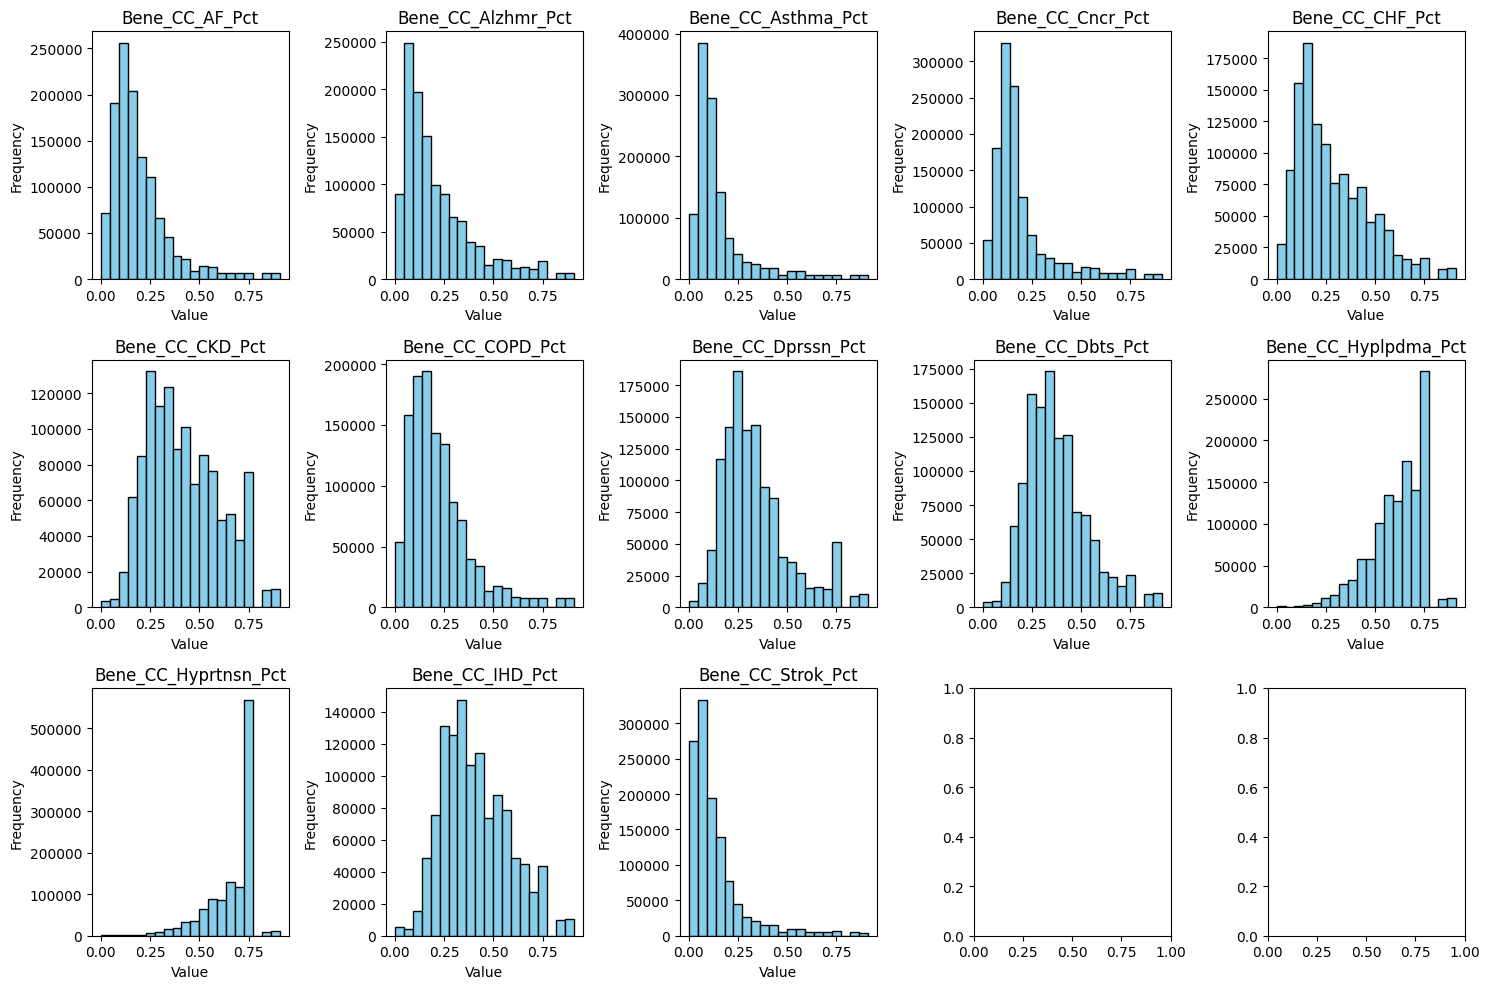

In [ ]:
import matplotlib.pyplot as plt

# Set the number of columns and rows for subplots
num_cols = 5
num_rows = 3

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot histograms for each numeric column
for i, column in enumerate(numeric_columns.columns):
    if column != 'Bene_Avg_Risk_Scre':  # Skip target variable
        ax = axes[i]
        ax.hist(numeric_columns[column], bins=20, color='skyblue', edgecolor='black')
        ax.set_title(column)
        ax.set_xlabel('Value')
        ax.set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


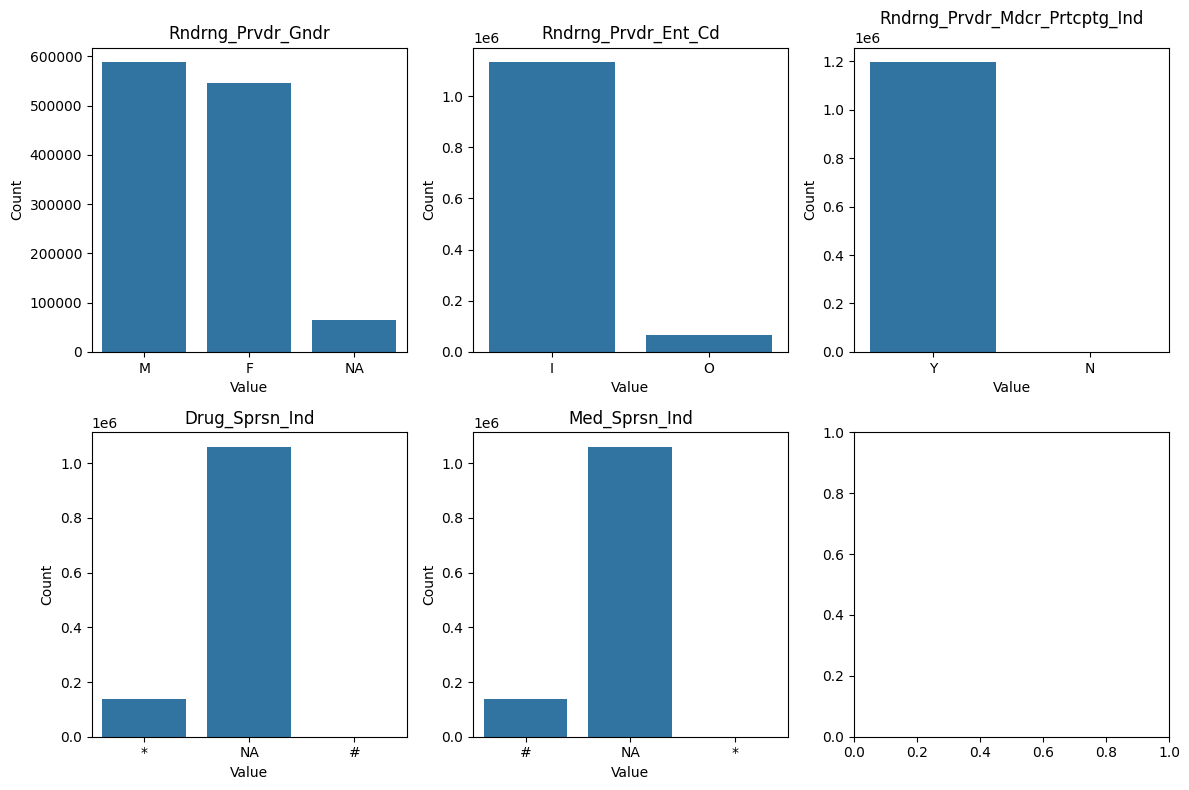

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns
categorical_columns = new_df.select_dtypes(include=['object']).columns

# Set the number of columns and rows for subplots
num_cols = 3
num_rows = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 8))

# Flatten the axes for easy iteration
axes = axes.flatten()

# Plot count plots for each categorical column
for i, column in enumerate(categorical_columns):
    ax = axes[i]
    sns.countplot(x=column, data=new_df, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

<Axes: xlabel='Bene_Avg_Risk_Scre', ylabel='Density'>

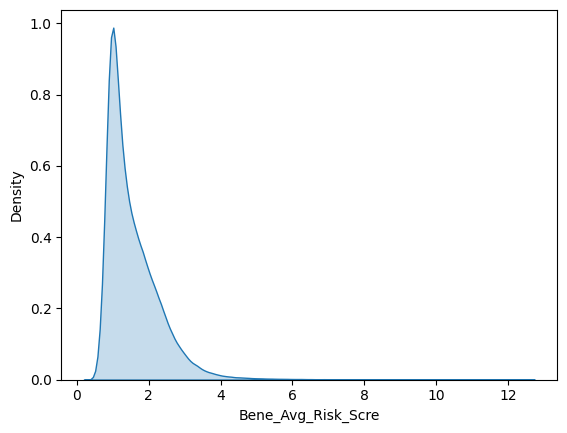

In [ ]:
sns.kdeplot(data=new_df["Bene_Avg_Risk_Scre"], fill=True)

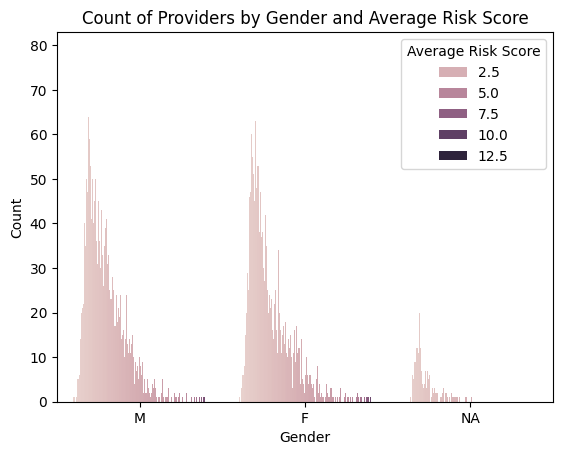

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a grouped bar plot
sns.countplot(x='Rndrng_Prvdr_Gndr', hue='Bene_Avg_Risk_Scre', data=new_df)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Providers by Gender and Average Risk Score')

# Show plot
plt.legend(title='Average Risk Score')
plt.show()

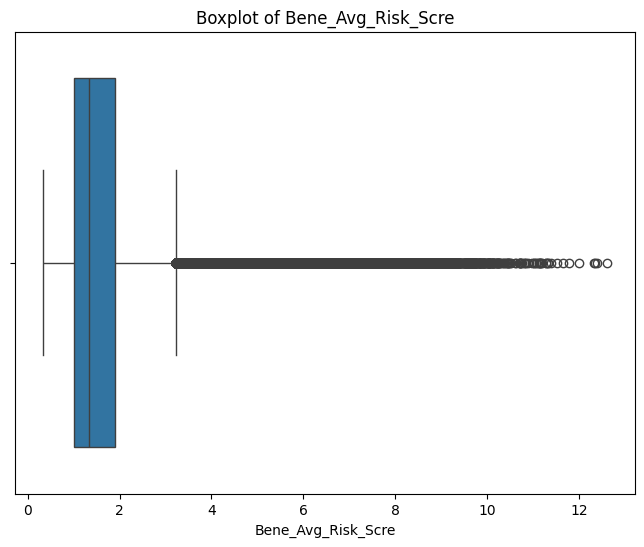

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the target variable
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bene_Avg_Risk_Scre', data=new_df)
plt.title('Boxplot of Bene_Avg_Risk_Scre')
plt.xlabel('Bene_Avg_Risk_Scre')
plt.show()

Observing the distribution, I've decided to remove outliers greater than 4 to ensure that extreme values, which might distort the analysis or model performance, are not included in the dataset.

In [ ]:
new_df[new_df["Bene_Avg_Risk_Scre"]<4].shape

(1184080, 19)

In [ ]:
new_df = new_df[new_df["Bene_Avg_Risk_Scre"]<4]

In [ ]:
new_df

,Bene_CC_AF_Pct,Bene_CC_Alzhmr_Pct,Bene_CC_Asthma_Pct,Bene_CC_Cncr_Pct,Bene_CC_CHF_Pct,Bene_CC_CKD_Pct,Bene_CC_COPD_Pct,Bene_CC_Dprssn_Pct,Bene_CC_Dbts_Pct,Bene_CC_Hyplpdma_Pct,Bene_CC_Hyprtnsn_Pct,Bene_CC_IHD_Pct,Bene_CC_Strok_Pct,Bene_Avg_Risk_Scre,Rndrng_Prvdr_Gndr,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_Mdcr_Prtcptg_Ind,Drug_Sprsn_Ind,Med_Sprsn_Ind
0,0.240000,0.300000,0.120000,0.160000,0.390000,0.520000,0.240000,0.370000,0.440000,0.750000,0.75,0.620000,0.140000,1.8026,M,I,Y,*,#
1,0.100000,0.070000,0.050000,0.140000,0.110000,0.240000,0.060000,0.150000,0.200000,0.520000,0.51,0.240000,0.030000,1.0785,M,I,Y,NA,NA
2,0.090000,0.060000,0.090000,0.110000,0.210000,0.370000,0.210000,0.390000,0.380000,0.580000,0.70,0.330000,0.060000,1.4920,M,I,Y,NA,NA
3,0.144928,0.144928,0.144928,0.144928,0.144928,0.160000,0.144928,0.280000,0.170000,0.550000,0.46,0.160000,0.144928,0.6362,F,I,Y,*,#
4,0.089286,0.089286,0.180000,0.089286,0.210000,0.350000,0.130000,0.320000,0.400000,0.480000,0.65,0.310000,0.089286,1.8233,M,I,Y,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198749,0.526316,0.526316,0.526316,0.000000,0.526316,0.526316,0.526316,0.526316,0.526316,0.526316,0.58,0.526316,0.526316,0.7823,F,I,Y,NA,NA
1198750,0.000000,0.555556,0.555556,0.555556,0.555556,0.555556,0.000000,0.555556,0.555556,0.555556,0.67,0.555556,0.000000,0.5746,M,I,Y,NA,NA
1198751,0.060000,0.055556,0.090000,0.080000,0.130000,0.240000,0.100000,0.210000,0.270000,0.530000,0.65,0.270000,0.055556,0.8958,NA,O,Y,NA,NA
1198752,0.120000,0.090000,0.070000,0.120000,0.140000,0.210000,0.080000,0.200000,0.230000,0.420000,0.55,0.270000,0.040000,1.1238,M,I,Y,*,#


<Axes: xlabel='Bene_Avg_Risk_Scre', ylabel='Density'>

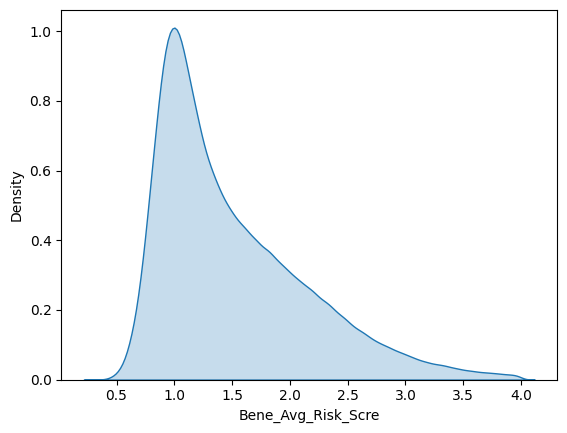

In [ ]:
sns.kdeplot(data=new_df["Bene_Avg_Risk_Scre"], fill=True)

<Axes: xlabel='Bene_Avg_Risk_Scre', ylabel='Density'>

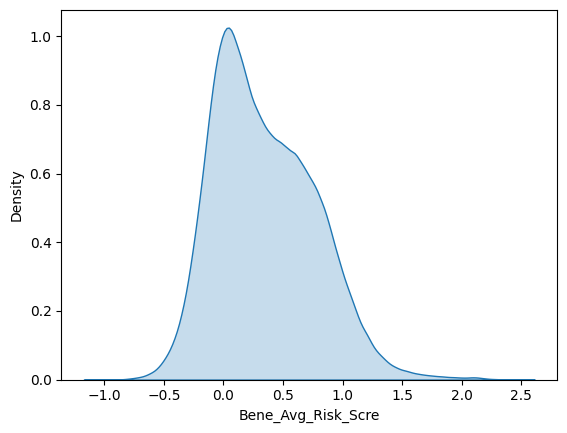

In [ ]:
sns.kdeplot(data=np.log(new_df["Bene_Avg_Risk_Scre"]), fill=True)

# **Data Preprocessing**

In [ ]:
# Separate Input and Output Variable
X = new_df.drop('Bene_Avg_Risk_Scre', axis=1)
y = new_df['Bene_Avg_Risk_Scre']

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((959003, 18), (239751, 18), (959003,), (239751,))

In [ ]:
# Select numerical and categorical columns
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X_test.select_dtypes(include=['object']).columns

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Standardize numerical features
scaler = StandardScaler()

X_train_num = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]),columns=numeric_columns,index = X_train.index)
X_test_num = pd.DataFrame(scaler.transform(X_test[numeric_columns]),columns=numeric_columns,index = X_test.index)


In [ ]:
# One-hot encode categorical features
OH_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform on the training data
X_train_OH = pd.DataFrame(OH_encoder.fit_transform(X_train[categorical_columns]),
                           columns=OH_encoder.get_feature_names_out(categorical_columns),
                           index=X_train.index)

# Transform on the test data (using the same encoder)
X_test_OH = pd.DataFrame(OH_encoder.transform(X_test[categorical_columns]),
                          columns=OH_encoder.get_feature_names_out(categorical_columns),
                          index=X_test.index)

In [ ]:
X_train_OH.shape, X_train.shape

((959003, 8), (959003, 18))

In [ ]:
# Concatenate the transformed features

X_train_concatenated = pd.concat([X_train_num, X_train_OH], axis=1)
X_test_concatenated = pd.concat([X_test_num, X_test_OH], axis=1)

In [ ]:
X_train_concatenated.shape, X_test_concatenated.shape, X_train.shape, X_test.shape

((959003, 21), (239751, 21), (959003, 18), (239751, 18))

In [ ]:
# # X_train_concatenated.to_csv('/content/drive/MyDrive/Innomatics_DS/DL_Projects/X_train_concatenated.csv', index=False)
# # X_test_concatenated.to_csv('/content/drive/MyDrive/Innomatics_DS/DL_Projects/X_test_concatenated.csv', index=False)
# y_train.to_csv('/content/drive/MyDrive/Innomatics_DS/DL_Projects/y_train.csv', index=False)
# y_test.to_csv('/content/drive/MyDrive/Innomatics_DS/DL_Projects/y_test.csv', index=False)

#**Model Building**

**Linear Regression**

In [ ]:
%%time

from sklearn import metrics
from sklearn.linear_model import LinearRegression
LR_Regression = LinearRegression()
LR_Regression.fit(X_train_concatenated, y_train)

# Predictions
y_test_predected_LR = LR_Regression.predict(X_test_concatenated)

# Metrics
LR_mae = metrics.mean_absolute_error(y_test, y_test_predected_LR)
LR_mse = metrics.mean_squared_error(y_test, y_test_predected_LR)
LR_rmse = np.sqrt(LR_mse)

CPU times: user 902 ms, sys: 321 ms, total: 1.22 s
Wall time: 1.26 s


In [ ]:
# Print results
print("Mean Absolute Error: ", LR_mae)
print("Mean Squared Error: ", LR_mse)
print("Root Mean Squared Error: ", LR_rmse)

Mean Absolute Error:  0.27848073988694333
Mean Squared Error:  0.16609276843187445
Root Mean Squared Error:  0.40754480542864785


In [ ]:
from joblib import dump

# Save the LR model to a file
dump(LR_Regression, '/content/drive/MyDrive/Innomatics_DS/DL_Projects/LR_model.pkl')

['/content/drive/MyDrive/Innomatics_DS/DL_Projects/LR_model.pkl']

**RandomForest**

In [ ]:
from sklearn import metrics

In [ ]:
%%time

from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
RF_Regression = RandomForestRegressor()
RF_Regression.fit(X_train_concatenated, y_train)

# Predictions
y_test_predicted_RF = RF_Regression.predict(X_test_concatenated)

# Metrics
RF_mae = metrics.mean_absolute_error(y_test, y_test_predicted_RF)
RF_mse = metrics.mean_squared_error(y_test, y_test_predicted_RF)
RF_rmse = np.sqrt(RF_mse)

CPU times: user 18min 5s, sys: 6.61 s, total: 18min 12s
Wall time: 18min 18s


In [ ]:
# Print results
print("Mean Absolute Error: ", RF_mae)
print("Mean Squared Error: ", RF_mse)
print("Root Mean Squared Error: ", RF_rmse)

Mean Absolute Error:  0.1849087602664378
Mean Squared Error:  0.08035263523207735
Root Mean Squared Error:  0.28346540394213426


In [ ]:
from joblib import dump

# Save the LR model to a file
dump(RF_Regression, '/content/drive/MyDrive/Innomatics_DS/DL_Projects/RF_model.pkl')

['/content/drive/MyDrive/Innomatics_DS/DL_Projects/RF_model.pkl']

**KNN**

In [ ]:
%%time

from sklearn.neighbors import KNeighborsRegressor
KNN_Regression = KNeighborsRegressor()
KNN_Regression.fit(X_train_concatenated, y_train)

# Predictions
y_test_predected_KNN = KNN_Regression.predict(X_test_concatenated)

# Metrics
KNN_mae = metrics.mean_absolute_error(y_test, y_test_predected_KNN)
KNN_mse = metrics.mean_squared_error(y_test, y_test_predected_KNN)
KNN_rmse = np.sqrt(KNN_mse)

CPU times: user 37min 28s, sys: 2.95 s, total: 37min 31s
Wall time: 22min 44s


In [ ]:
# Print results
print("Mean Absolute Error: ", KNN_mae)
print("Mean Squared Error: ", KNN_mse)
print("Root Mean Squared Error: ", KNN_rmse)

Mean Absolute Error:  0.19408131198905484
Mean Squared Error:  0.08952347263761064
Root Mean Squared Error:  0.2992047336484011


In [ ]:
from joblib import dump

# Save the KNN model to a file
dump(KNN_Regression, '/content/drive/MyDrive/Innomatics_DS/DL_Projects/KNN_model.pkl')

['/content/drive/MyDrive/Innomatics_DS/DL_Projects/KNN_model.pkl']

#**ANN**

In [ ]:
# !pip install tensorflow  # Install TensorFlow

In [ ]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import AdamW

In [ ]:
from tensorflow.keras.layers import Input

# Define the model
model = Sequential([
    Input(shape=(X_train_concatenated.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer with 1 neuron for regression
])

# try with Leaky Relu
# add batch normalization, dropout (0.2 - 0.5)
# add more hidden layers

In [ ]:
# Compile the model with AdamW optimizer
model.compile(optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4), loss='mse', metrics=['mae', 'mse'])

In [ ]:
%%time
# Train the model
Train_Model = model.fit(X_train_concatenated, y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=1)

# Evaluate the model
loss, mae, mse = model.evaluate(X_test_concatenated, y_test, verbose=0)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

Epoch 1/30
7579/7579 [==============================] - 32s 4ms/step - loss: 0.0859 - mae: 0.1952 - mse: 0.0859 - val_loss: 0.0843 - val_mae: 0.1915 - val_mse: 0.0843
Epoch 2/30
7579/7579 [==============================] - 30s 4ms/step - loss: 0.0820 - mae: 0.1898 - mse: 0.0820 - val_loss: 0.0827 - val_mae: 0.1921 - val_mse: 0.0827
Epoch 3/30
7579/7579 [==============================] - 30s 4ms/step - loss: 0.0803 - mae: 0.1874 - mse: 0.0803 - val_loss: 0.0803 - val_mae: 0.1848 - val_mse: 0.0803
Epoch 4/30
7579/7579 [==============================] - 28s 4ms/step - loss: 0.0795 - mae: 0.1861 - mse: 0.0795 - val_loss: 0.0805 - val_mae: 0.1859 - val_mse: 0.0805
Epoch 5/30
7579/7579 [==============================] - 31s 4ms/step - loss: 0.0788 - mae: 0.1853 - mse: 0.0788 - val_loss: 0.0795 - val_mae: 0.1853 - val_mse: 0.0795
Epoch 6/30
7579/7579 [==============================] - 31s 4ms/step - loss: 0.0783 - mae: 0.1846 - mse: 0.0783 - val_loss: 0.0794 - val_mae: 0.1841 - val_mse: 0.079

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1408      
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5633 (22.00 KB)
Trainable params: 5633 (22.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


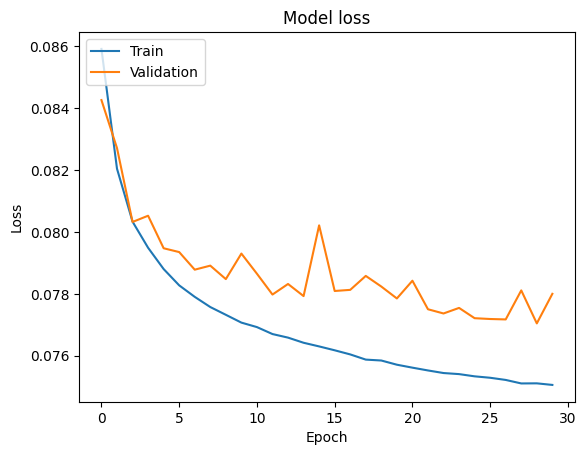

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(Train_Model.history['loss'])
plt.plot(Train_Model.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
from joblib import dump

# Save the model to a file
dump(Train_Model, '/content/drive/MyDrive/Innomatics_DS/DL_Projects/ANN_model.pkl')

['/content/drive/MyDrive/Innomatics_DS/DL_Projects/ANN_model.pkl']

#**Conclusion**

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'KNN', 'ANN'],
    'Mean Absolute Error': [0.278, 0.185, 0.194, 0.183],
    'Mean Squared Error': [0.166, 0.080, 0.090, 0.078],
    'Root Mean Squared Error': [0.408, 0.283, 0.299, None]
})
results

,Model,Mean Absolute Error,Mean Squared Error,Root Mean Squared Error
0,Linear Regression,0.278,0.166,0.408
1,Random Forest,0.185,0.080,0.283
2,KNN,0.194,0.090,0.299
3,ANN,0.183,0.078,NaN


The ANN model demonstrates the lowest errors, with a Mean Absolute Error (MAE) of 0.183 and Mean Squared Error (MSE) of 0.078. Therefore, the Artificial Neural Network (ANN) model outperforms Linear Regression, Random Forest, and KNN, suggesting its suitability for predictive modeling in this context.

#**Hyperparameter tuning**

In [ ]:
!pip install keras-tuner --upgrade
import keras_tuner
import keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
print(tf.__version__)
print(keras.__version__)
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout, BatchNormalization, Flatten, Conv2D, MaxPooling2D
from keras.datasets import mnist
import keras_tuner
import keras

2.15.0
2.15.0


In [ ]:
import tensorflow.keras as keras
from kerastuner.tuners import BayesianOptimization

# Define the model-building function
def build_model_2(hp):
    model = keras.Sequential()
    model.add(keras.layers.Dense(512, activation='sigmoid'))

    # Define hyperparameters for the first hidden layer
    model.add(keras.layers.Dense(units=hp.Choice('units', [256,128, 64, 32]), activation='relu'))

    # Define hyperparameters for the second hidden layer
    model.add(keras.layers.Dense(units=hp.Choice('units_1', [256,128, 64, 32]), activation='relu'))

    # # Define hyperparameters for the third hidden layer
    # model.add(keras.layers.Dense(units=hp.Choice('units_2', [256,128, 64, 32]), activation='relu'))

    # Last Layer
    model.add(keras.layers.Dense(1))  # Output layer for regression
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])
    return model

# Instantiate the tuner
tuner_2 = BayesianOptimization(
    hypermodel=build_model_2,
    objective='val_mae',
    max_trials=5,
    seed=None,
    directory='my_dir',
    project_name='my_DL_project_1'
)


<ipython-input-40-ce03bfb71825>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import BayesianOptimization


In [ ]:
# Perform hyperparameter search
tuner_2.search(X_train_concatenated, y_train, epochs=30, batch_size=100, validation_split=0.2, verbose=1)

# Retrieve the best model
best_model = tuner_2.get_best_models(num_models=1)[0]


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
256               |256               |units
32                |32                |units_1

Epoch 1/30
7673/7673 [==============================] - 67s 9ms/step - loss: 0.1878 - mae: 0.2545 - mse: 0.1878 - val_loss: 0.1676 - val_mae: 0.2635 - val_mse: 0.1676
Epoch 2/30
7673/7673 [==============================] - 59s 8ms/step - loss: 0.1559 - mae: 0.2296 - mse: 0.1559 - val_loss: 0.1486 - val_mae: 0.2214 - val_mse: 0.1486
Epoch 3/30
7673/7673 [==============================] - 62s 8ms/step - loss: 0.1481 - mae: 0.2226 - mse: 0.1481 - val_loss: 0.1516 - val_mae: 0.2196 - val_mse: 0.1516
Epoch 4/30
7673/7673 [==============================] - 68s 9ms/step - loss: 0.1436 - mae: 0.2186 - mse: 0.1436 - val_loss: 0.1405 - val_mae: 0.2142 - val_mse: 0.1405
Epoch 5/30
7673/7673 [==============================] - 61s 8ms/step - loss: 0.1402 - mae: 0.2157 - mse: 0.1402 - val_loss: 0.1356 - val_mae: 0.2170 - val_mse: 0

KeyboardInterrupt: 

In [ ]:

# Retrieve the best hyperparameters
best_hp = tuner_2.get_best_hyperparameters(num_trials=1)[0]

# Print the number of neurons chosen for each layer
print("Best Hyperparameters:")
print("First hidden layer units:", best_hp.get('units'))
print("Second hidden layer units:", best_hp.get('units_1'))
print("Third hidden layer units:", best_hp.get('units_2'))
